<a href="https://colab.research.google.com/github/JeanAlmeida1/Previsao-de-Churn-Telecom/blob/main/customer_churn_prediction_dataset_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Competição Kaggle**

Link: https://www.kaggle.com/competitions/customer-churn-prediction-2020/

This competition is about predicting whether a customer will change telecommunications provider, something known as "churning".

The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

* "state", string. 2-letter code of the US state of customer residence
* "account_length", numerical. Number of months the customer has been with the current telco provider
* "area_code", string="area_code_AAA" where AAA = 3 digit area code.
* "international_plan", (yes/no). The customer has international plan.
* "voice_mail_plan", (yes/no). The customer has voice mail plan.
* "number_vmail_messages", numerical. Number of voice-mail messages.
* "total_day_minutes", numerical. Total minutes of day calls.
* "total_day_calls", numerical. Total minutes of day calls.
* "total_day_charge", numerical. Total charge of day calls.
* "total_eve_minutes", numerical. Total minutes of evening calls.
* "total_eve_calls", numerical. Total number of evening calls.
* "total_eve_charge", numerical. Total charge of evening calls.
* "total_night_minutes", numerical. Total minutes of night calls.
* "total_night_calls", numerical. Total number of night calls.
* "total_night_charge", numerical. Total charge of night calls.
* "total_intl_minutes", numerical. Total minutes of international calls.
* "total_intl_calls", numerical. Total number of international calls.
* "total_intl_charge", numerical. Total charge of international calls
* "number_customer_service_calls", numerical. Number of calls to customer service
* "churn", (yes/no). Customer churn - target variable.
The submissions will be evaluated using the test Accuracy criterion:



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style='ticks', palette='pastel')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.shape

(4250, 20)

In [5]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


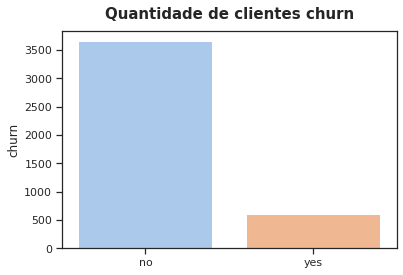

In [8]:
# Quantidade de clientes churn
plt.title('Quantidade de clientes churn', fontweight='bold', fontsize=15, pad=12)
sns.barplot(x=df['churn'].unique(), y=df['churn'].value_counts());

<Figure size 432x288 with 0 Axes>

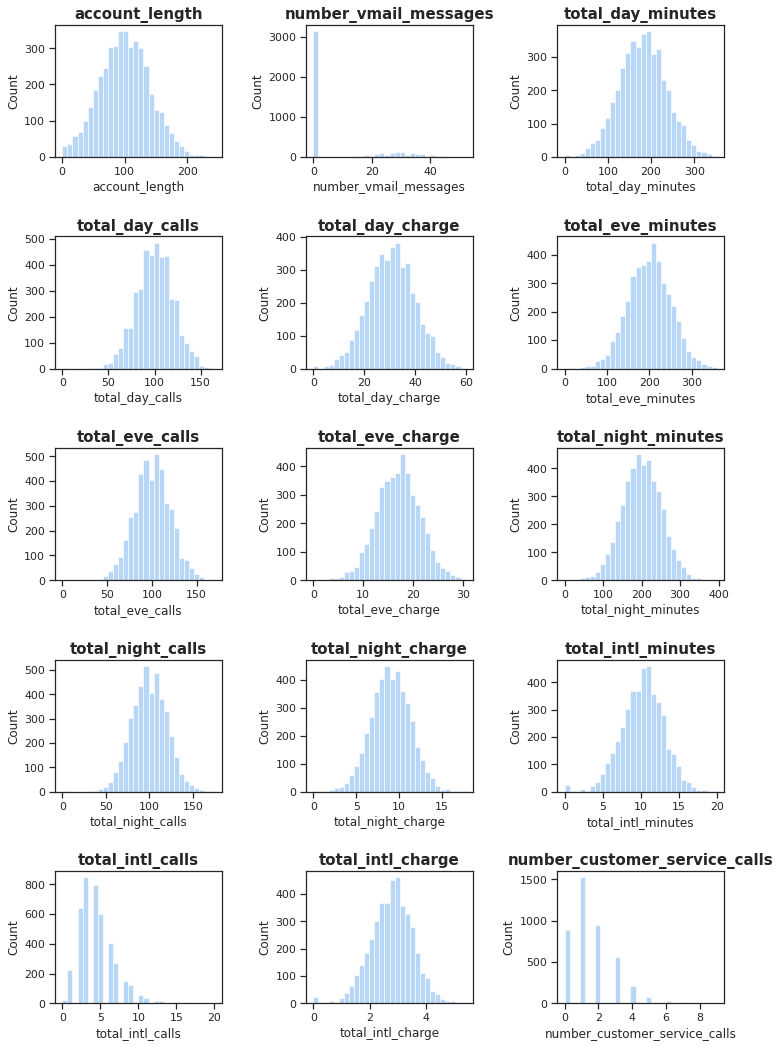

In [9]:
# Plotando o histograma das variáveis 

#1 - definindo o número de linhas e colunas do plot 
colnames_number = df.select_dtypes(include='number').columns
ncols = 3
nrows = int(np.ceil(len(colnames_number)/ncols*1.0))

#2 - Fazendo um for para percorrer todos os axis e plotar as figuras

fig = plt.figure()
fig, axes = plt.subplots(nrows = nrows, ncols=ncols, figsize=(12,18))   


counter = 0
for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    
    if counter < len(colnames_number):
      sns.histplot(x = df.select_dtypes(include='number')[colnames_number[counter]], palette='hls', bins=30, ax=ax)
      ax.set_title(colnames_number[counter], fontsize=15, fontweight='bold')
    else:
      ax.set_axis_off()
    counter += 1 

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.6)

fig.show();

Com exceção de number_vmail_messages e number_customer_service_calls, as outras variáveis parecem obedecer a distribuições normais. 

In [34]:
df['state'].value_counts().index

Index(['WV', 'MN', 'ID', 'AL', 'VA', 'OR', 'TX', 'UT', 'NY', 'NJ', 'WY', 'OH',
       'WI', 'MA', 'ME', 'CT', 'RI', 'MI', 'KS', 'MD', 'VT', 'KY', 'NV', 'IN',
       'MS', 'WA', 'NC', 'MO', 'DE', 'CO', 'MT', 'IL', 'TN', 'NM', 'OK', 'NH',
       'HI', 'AZ', 'FL', 'SD', 'NE', 'DC', 'SC', 'AR', 'LA', 'PA', 'ND', 'GA',
       'IA', 'AK', 'CA'],
      dtype='object')

In [45]:
df['state'].value_counts(ascending=True)

CA     39
AK     61
IA     62
GA     64
ND     67
PA     67
LA     69
AR     71
DC     72
SC     72
NE     73
SD     75
FL     76
AZ     77
HI     77
OK     78
NH     78
NM     78
TN     79
IL     79
DE     80
CO     80
MT     80
MO     80
NC     80
WA     80
MS     82
NV     83
IN     83
KY     85
VT     86
MD     86
KS     87
RI     87
MI     87
CT     88
ME     89
MA     89
WI     94
WY     95
OH     95
NY     96
NJ     96
UT     97
TX     98
OR     99
VA    100
AL    101
ID    106
MN    108
WV    139
Name: state, dtype: int64

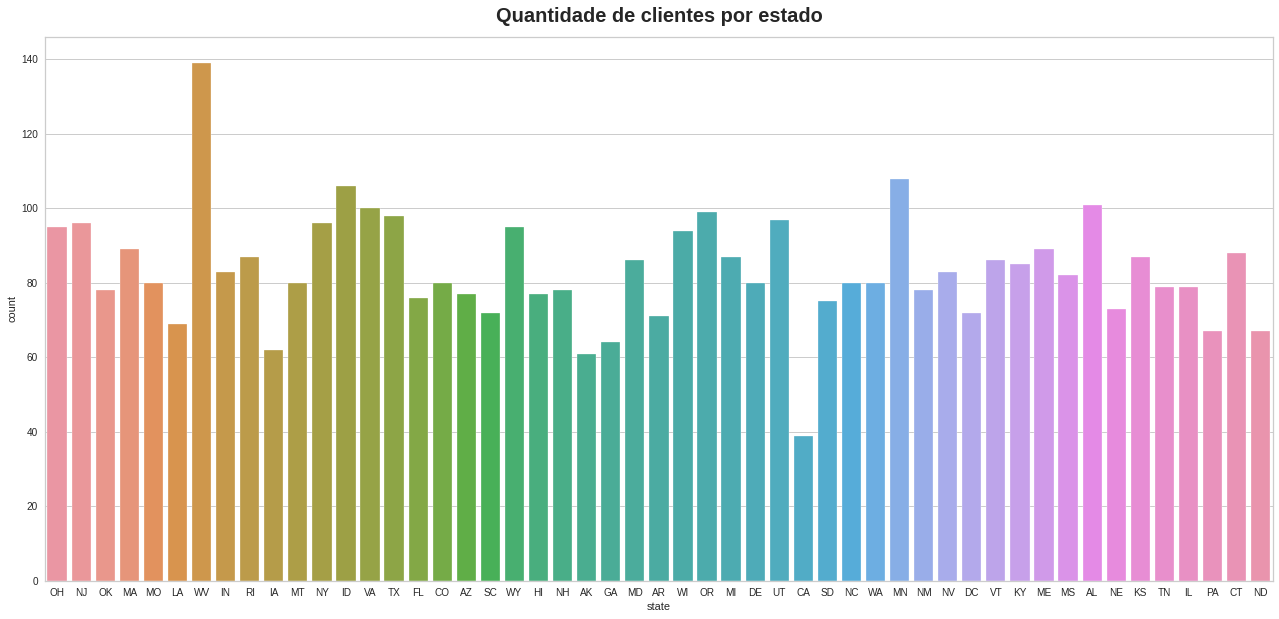

In [54]:
plt.figure(figsize=(22, 10))
sns.countplot(data=df, x='state')
plt.title('Quantidade de clientes por estado', fontweight='bold', fontsize=20, pad=15)
plt.show();

## Transformação das variáveis 

In [10]:
df.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no


In [11]:
# Transformando variáveis binárias em dummys: yes = 1, no = 0. 

var_binarias = ['international_plan', 'voice_mail_plan', 'churn'] 

for col in var_binarias:
  df[col] = df[col].apply(lambda x: 1 if x == 'yes' else 0)

In [12]:
df.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0


In [13]:
df['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [14]:
### criando dummies para area_code 

df_area_code = pd.get_dummies(df['area_code'], prefix='area', drop_first=True)
df_area_code.head(3)

,area_area_code_415,area_area_code_510
0,1,0
1,1,0
2,0,0


In [15]:
# adicionando as dummies no dataframe 

df = df.merge(df_area_code, left_index=True, right_index=True)
df = df.drop('area_code', axis=1)

In [16]:
df.head(3)

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_area_code_415,area_area_code_510
0,OH,107,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,1,0
1,NJ,137,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,1,0
2,OH,84,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,0,0


In [17]:
# Criando função para normalizar colunas 
'''
Essa função exige o formato array, e deve ser utilizada após a separação entre treino e teste, de forma a evitar data leakage.
'''
def normalizar(x):
  Scaler = MinMaxScaler()
  x = Scaler.fit_transform(x)
  return x

### Clusterização de estados

In [55]:
# Clusterizando os dados com o dataframe completo, sem divisão entre treino e teste

X = df.drop('churn', axis=1)
y = df['churn']

In [58]:
# Criando dataframe com dummies
state_dummies = pd.get_dummies(X['state'], prefix='state', drop_first=True)

In [59]:
# Merge no dataframe principal 

X = X.drop('state', axis=1)
X = X.merge(state_dummies, right_index=True, left_index=True)

In [60]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,0,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,0,0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Normalizando os dados

X_norm = normalizar(X)

In [73]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

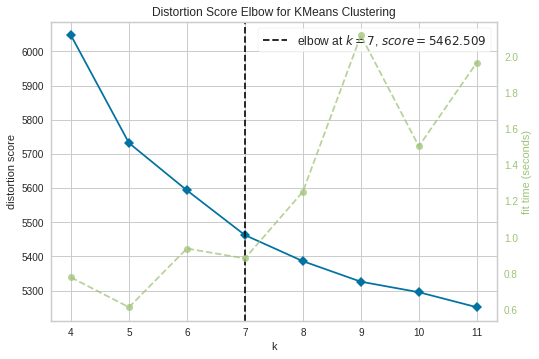

In [74]:
# Método de Elbow para ver a quantidade ideal de clusters
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))
visualizer.fit(X_norm)
visualizer.show();

O número de 7 clusters parece o ideal. 

In [75]:
# Clusterizando os estados com KMeans 
clusters = KMeans(n_clusters=7).fit_predict(X_norm)

In [78]:
set(clusters)

{0, 1, 2, 3, 4, 5, 6}

## Preparação final dos dados

In [79]:
# Preparando o dataframe final
df_final = df.drop('state', axis=1)

In [81]:
# Adicionando os clusters
df_final['clusters_state'] = clusters

In [82]:
df_final.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_area_code_415,area_area_code_510,clusters_state
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,1,0,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,1,0,2
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,0,0,1
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,1,0,5
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,118,9.57,7.5,7,2.03,3,0,0,1,3


## Seleção de features (Boruta) e modelagem

In [88]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 1.6 MB/s 


In [89]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor

In [90]:
ytrain_boruta = df_final['churn'].values.ravel()
xtrain_cols = df_final[df_final.columns[(df_final.columns != 'churn')]]
xtrain_boruta = xtrain_cols.values

In [91]:
# Definindo Boruta

rf = RandomForestRegressor(n_jobs=-1)
boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 )
boruta_selec = boruta.fit(xtrain_boruta, ytrain_boruta)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	7


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	7


In [92]:
# Separando as variáveis selecionadas
cols_selected = boruta.support_.tolist()
cols_selected_boruta = xtrain_cols.iloc[:, cols_selected].columns.to_list()

In [93]:
cols_selected_boruta

['international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [94]:
# Separando em X e Y 

X = df_final[cols_selected_boruta]
y = df_final['churn']

In [96]:
## Separando variáveis em train_test_split

X_train, X_test, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
X_train.shape, X_test.shape, ytrain.shape, ytest.shape

((3400, 13), (850, 13), (3400,), (850,))

In [98]:
# Normalizando as features 

Xtrain = normalizar(X_train)
Xtest = normalizar(X_test) 

In [104]:
# Importando pacotes 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, log_loss, precision_recall_curve, auc, average_precision_score, recall_score
import time 

In [105]:
# Definindo modelos a serem testados 

classification_models = {"LogisticRegression": LogisticRegression(),
                         "DecisionTree":DecisionTreeClassifier(),
                         "RandomForest": RandomForestClassifier(),
                         "XGBoost": XGBClassifier(),
                         "MLPClassifier": MLPClassifier(max_iter = 2000), # max_iter defaut = 200                     
} 



In [106]:
# Criando um looping para testar todos os modelos 

df_results = pd.DataFrame(columns=['model', 'run_time', 'recall', 'average_precision','accuracy'])

for key in classification_models:

    print('*',key)

    start_time = time.time()

    clas = classification_models[key]
    model = clas.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)

    scores = cross_val_score(model, 
                             Xtrain, 
                             ytrain,
                             scoring='recall', 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'recall': recall_score(ytest, y_pred),
           'average_precision': average_precision_score(ytest, y_pred),
           'accuracy': accuracy_score(ytest, y_pred)
    }

    df_results = df_results.append(row, ignore_index=True) 

* LogisticRegression
* DecisionTree
* RandomForest
* XGBoost
* MLPClassifier


In [107]:
df_results

,model,run_time,recall,average_precision,accuracy
0,LogisticRegression,0.01,0.240310,0.270494,0.864706
1,DecisionTree,0.01,0.751938,0.523900,0.900000
2,RandomForest,0.12,0.806202,0.791639,0.963529
3,XGBoost,0.05,0.759690,0.738825,0.954118
4,MLPClassifier,2.19,0.759690,0.600483,0.923529


## Seleção de features (SelectKBest) e Modelagem

In [109]:
X = df_final.drop('churn', axis=1)
y = df_final['churn']

In [110]:
X_train, X_test, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
X_train.shape, X_test.shape, ytrain.shape, ytest.shape

((3400, 20), (850, 20), (3400,), (850,))

In [112]:
# Normalizando as features 

Xtrain = normalizar(X_train)
Xtest = normalizar(X_test) 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [140]:
# Selecionando as melhores features
k_vs_score = []

for k_num in range(1,df_final.shape[1]):
  selector = SelectKBest(score_func=f_regression, k=k_num)
  ztrain = selector.fit_transform(Xtrain,ytrain)
  ztest = selector.transform(Xtest)

  mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
  mdl.fit(ztrain, ytrain)
  p = mdl.predict(ztest)

  score = mean_absolute_error(ytest, p)
  print("k = {} - MAE = {}".format(k_num, score))
  k_vs_score.append(score)

k = 1 - MAE = 0.2301134068899623
k = 2 - MAE = 0.20931497479443345
k = 3 - MAE = 0.1742427973007385
k = 4 - MAE = 0.17474828749681692
k = 5 - MAE = 0.1609077871148459
k = 6 - MAE = 0.16161866946778713
k = 7 - MAE = 0.12391764705882352
k = 8 - MAE = 0.12394117647058825
k = 9 - MAE = 0.12630588235294118
k = 10 - MAE = 0.11136470588235294
k = 11 - MAE = 0.11142352941176471
k = 12 - MAE = 0.11074117647058823
k = 13 - MAE = 0.1105294117647059
k = 14 - MAE = 0.09547058823529413
k = 15 - MAE = 0.09922352941176471
k = 16 - MAE = 0.09934117647058824
k = 17 - MAE = 0.10487058823529412
k = 18 - MAE = 0.11050588235294119
k = 19 - MAE = 0.11730588235294119
k = 20 - MAE = 0.1175529411764706


Text(0.5, 1.0, 'Determinando o número de variáveis')

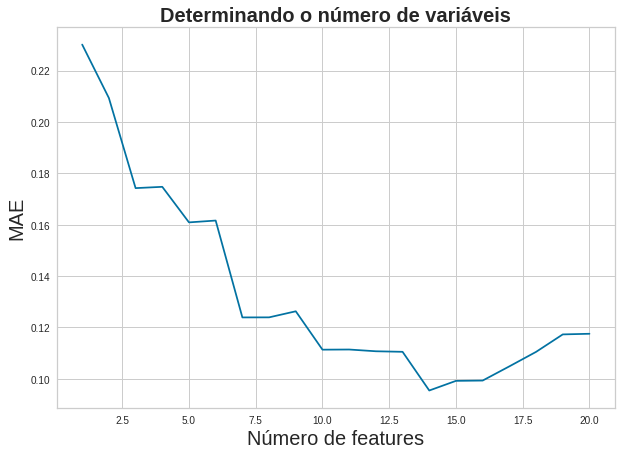

In [141]:
pd.Series(k_vs_score, index=range(1, df_final.shape[1])).plot(figsize=(10,7))
plt.xlabel('Número de features', fontsize=20)
plt.ylabel('MAE', fontsize=20)
plt.title('Determinando o número de variáveis', fontsize=20, fontweight='bold')

O valor ótimo de features parece ser entre 13 e 16 variáveis, usando score_func chi2 e f_regression. O número melhor parece ser o de 14.  

In [142]:
selector = SelectKBest(score_func=f_regression, k=14)
selector.fit(Xtrain, ytrain)

mask = selector.get_support()

In [147]:
cols_kbest = X.columns[mask]
cols_kbest

Index(['international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_charge', 'total_eve_minutes',
       'total_eve_charge', 'total_night_minutes', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'clusters_state'],
      dtype='object')

In [153]:
# selecionando features escolhidas pelo kbest
X_kbest = df_final[cols_kbest]
y_kbest = df_final['churn']

In [154]:
# separação entre treino e teste
X_train, X_test, ytrain, ytest = train_test_split(X_kbest, y_kbest, test_size=0.2, random_state=42)

In [155]:
X_train.shape, X_test.shape, ytrain.shape, ytest.shape

((3400, 14), (850, 14), (3400,), (850,))

In [156]:
# Normalizando as features 

Xtrain = normalizar(X_train)
Xtest = normalizar(X_test) 

In [157]:
# Criando um looping para testar todos os modelos 

df_results2 = pd.DataFrame(columns=['model', 'run_time', 'recall', 'average_precision','accuracy'])

for key in classification_models:

    print('*',key)

    start_time = time.time()

    clas = classification_models[key]
    model = clas.fit(Xtrain, ytrain)
    y_pred = model.predict(Xtest)

    scores = cross_val_score(model, 
                             Xtrain, 
                             ytrain,
                             scoring='recall', 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'recall': recall_score(ytest, y_pred),
           'average_precision': average_precision_score(ytest, y_pred),
           'accuracy': accuracy_score(ytest, y_pred)
    }

    df_results2 = df_results2.append(row, ignore_index=True) 

* LogisticRegression
* DecisionTree
* RandomForest
* XGBoost
* MLPClassifier


In [158]:
df_results2

,model,run_time,recall,average_precision,accuracy
0,LogisticRegression,0.02,0.240310,0.267327,0.863529
1,DecisionTree,0.01,0.782946,0.549788,0.905882
2,RandomForest,0.23,0.775194,0.751890,0.956471
3,XGBoost,0.05,0.751938,0.745783,0.955294
4,MLPClassifier,3.49,0.767442,0.593947,0.921176


## Resultados

In [160]:
df_results['feature_selection'] = 'Boruta'
df_results2['feature_selection'] = 'KBest' 

In [162]:
# Resultados com features escolhidas pelo Boruta 
df_results

,model,run_time,recall,average_precision,accuracy,feature_selection
0,LogisticRegression,0.01,0.240310,0.270494,0.864706,Boruta
1,DecisionTree,0.01,0.751938,0.523900,0.900000,Boruta
2,RandomForest,0.12,0.806202,0.791639,0.963529,Boruta
3,XGBoost,0.05,0.759690,0.738825,0.954118,Boruta
4,MLPClassifier,2.19,0.759690,0.600483,0.923529,Boruta


In [163]:
# Resultados com features escolhidas pelo Select KBest
df_results2

,model,run_time,recall,average_precision,accuracy,feature_selection
0,LogisticRegression,0.02,0.240310,0.267327,0.863529,KBest
1,DecisionTree,0.01,0.782946,0.549788,0.905882,KBest
2,RandomForest,0.23,0.775194,0.751890,0.956471,KBest
3,XGBoost,0.05,0.751938,0.745783,0.955294,KBest
4,MLPClassifier,3.49,0.767442,0.593947,0.921176,KBest


In [165]:
df_resultados = pd.concat([df_results, df_results2])

In [167]:
df_resultados.sort_values(by='accuracy', ascending=False)

,model,run_time,recall,average_precision,accuracy,feature_selection
2,RandomForest,0.12,0.806202,0.791639,0.963529,Boruta
2,RandomForest,0.23,0.775194,0.751890,0.956471,KBest
3,XGBoost,0.05,0.751938,0.745783,0.955294,KBest
3,XGBoost,0.05,0.759690,0.738825,0.954118,Boruta
4,MLPClassifier,2.19,0.759690,0.600483,0.923529,Boruta
4,MLPClassifier,3.49,0.767442,0.593947,0.921176,KBest
1,DecisionTree,0.01,0.782946,0.549788,0.905882,KBest
1,DecisionTree,0.01,0.751938,0.523900,0.900000,Boruta
0,LogisticRegression,0.01,0.240310,0.270494,0.864706,Boruta
0,LogisticRegression,0.02,0.240310,0.267327,0.863529,KBest


**O modelo Random Forest com features escolhidas pelo Boruta retornou a melhor acurácia, precisão média e recall entre todos os modelos testados.**